<a href="https://colab.research.google.com/github/JihenSkima/DL_With_PyTorch/blob/main/DeepLearning_with_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as f


In [3]:
class Model(nn.Module):
  def __init__(self,in_features=4,out_features=8,h1=8,h2=9):
    super().__init__()

    self.fc1 = nn.Linear(in_features,h1)
    self.fc2 = nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_features)

  def forward(self,x):
    x = f.relu(self.fc1(x))
    x = f.relu(self.fc2(x))
    x = self.out(x)

    return x


In [4]:
#manual seed  for randomization

torch.manual_seed(41)
model = Model()

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [6]:
url ='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [7]:
#df.head()

In [8]:
#Change the last column ( string ) to numeric
df['species'] = df['species'].replace('setosa',0.0)
df['species'] = df['species'].replace('versicolor',1.0)
df['species'] = df['species'].replace('virginica',2.0)

<ipython-input-8-286369389>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica',2.0)


In [9]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [10]:
#train test split
x_train = df.drop('species',axis=1)
y_train = df['species']

In [11]:
#convert to numpy array
x = x_train.values
y = y_train.values

In [12]:
from sklearn.model_selection import train_test_split

x_train , x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)


In [13]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)


In [14]:
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)


In [15]:
#set the criterion of model to measure the error , how far off the prediction are from
criterion = nn.CrossEntropyLoss()

#Choose Optimizer
optim = torch.optim.Adam(model.parameters(),lr=0.01)


In [16]:
#Train the model now
epoch = 200
losses = []

for i in range(epoch):
  #go forward and get a prediction
  y_pred = model.forward(x_train) #get predicted results

  #measure the loss
  loss = criterion(y_pred, y_train)

  #Keep track of our losses
  losses.append(loss.detach().numpy())

  #print every 10 epochs
  if i % 10 == 0:
    print(f'Epoch:{i} and loss :{loss}')

    #back propagation
    optim.zero_grad()
    loss.backward()
    optim.step()


Epoch:0 and loss :1.9632219076156616
Epoch:10 and loss :1.9182052612304688
Epoch:20 and loss :1.8710678815841675
Epoch:30 and loss :1.8203237056732178
Epoch:40 and loss :1.7659838199615479
Epoch:50 and loss :1.7092050313949585
Epoch:60 and loss :1.651965618133545
Epoch:70 and loss :1.5969871282577515
Epoch:80 and loss :1.5463052988052368
Epoch:90 and loss :1.4986011981964111
Epoch:100 and loss :1.4511761665344238
Epoch:110 and loss :1.4030191898345947
Epoch:120 and loss :1.3544074296951294
Epoch:130 and loss :1.3064517974853516
Epoch:140 and loss :1.260670781135559
Epoch:150 and loss :1.2186857461929321
Epoch:160 and loss :1.1820465326309204
Epoch:170 and loss :1.1518495082855225
Epoch:180 and loss :1.1278384923934937
Epoch:190 and loss :1.1119825839996338


Text(0.5, 0, 'Epoch')

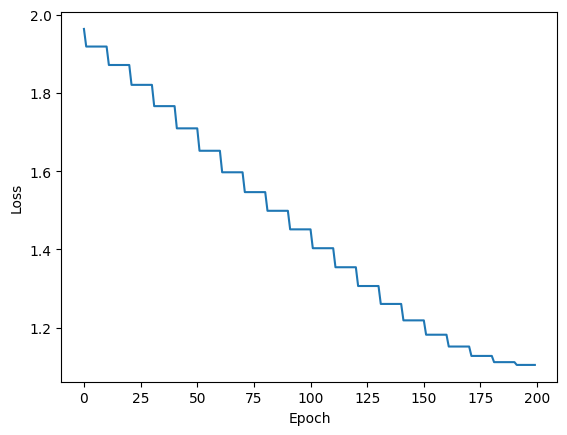

In [17]:
plt.plot(range(epoch),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [18]:
model.eval() #put the model in evaluation mode ( disables dropout, batchnorm behavior))
with torch.no_grad():
  y_eval = model(x_test) #or y_eval = model.forward(x_test)
  loss = criterion(y_eval,y_test)
  print(loss)

tensor(1.1084)


In [19]:
#evaluate the model on the test data set
with torch.no_grad(): #basically turn off back propagation
  y_eval = model.forward(x_test) #X_test are features from our test set , y_eval will be predictions
  loss = criterion(y_eval,y_test) #computes the loss between prediction and true labels.find the loss or the error
  print(loss)



tensor(1.1084)


In [23]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(x_test):
    y_val = model.forward(data)

    #will tell us what types of flower class our network thinks it is
    print(f'{i+1}.) {str(y_val)} \t {y_test[i]} \t{y_val.argmax().item() ==y_test[i]} ')


    #correct or not
    if y_val.argmax().item() ==y_test[i]:
      correct +=1

print(f'we got {correct} correct')

1.) tensor([ 2.1597,  2.3691,  2.1504, -1.6070, -2.5717, -1.1779, -1.8239, -2.1393]) 	 1 	True 
2.) tensor([ 2.0663,  2.1972,  1.9858, -1.5361, -2.3539, -1.0354, -1.6579, -2.0798]) 	 0 	False 
3.) tensor([ 2.6220,  2.9167,  2.7512, -1.9385, -3.2812, -1.5815, -2.2922, -2.4977]) 	 2 	False 
4.) tensor([ 2.1757,  2.4106,  2.1911, -1.6193, -2.6261, -1.2152, -1.8641, -2.1446]) 	 1 	True 
5.) tensor([ 2.3293,  2.5665,  2.3522, -1.7142, -2.8069, -1.3031, -1.9911, -2.2898]) 	 1 	True 
6.) tensor([ 1.9764,  2.1153,  1.8985, -1.4794, -2.2586, -0.9918, -1.5933, -1.9935]) 	 0 	False 
7.) tensor([ 2.0673,  2.2839,  2.0600, -1.5464, -2.4711, -1.1301, -1.7549, -2.0518]) 	 1 	True 
8.) tensor([ 2.4673,  2.7803,  2.5702, -1.8119, -3.0791, -1.4708, -2.1853, -2.3863]) 	 2 	False 
9.) tensor([ 2.1575,  2.4000,  2.1767, -1.6058, -2.6119, -1.2099, -1.8571, -2.1277]) 	 1 	True 
10.) tensor([ 2.0845,  2.2942,  2.0720, -1.5574, -2.4825, -1.1332, -1.7618, -2.0698]) 	 1 	True 
11.) tensor([ 2.3662,  2.6403,  2.4

In [24]:
new_iris = torch.tensor([4.7,3.2,1.3,0.2])

In [25]:
with torch.no_grad():
  print(model(new_iris))

tensor([ 1.7894,  1.9020,  1.6798, -1.3607, -2.0047, -0.8577, -1.4133, -1.8265])


In [26]:
#save our model
torch.save(model.state_dict(),'iris_model.pt')


In [27]:
#load the save model
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [28]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=8, bias=True)
)